## Part 2

### Steps for Predictive Modeling 

**y =f(X)**

1. Define Problem Statement

    * Build model that predicts a likelihood that a resident will renew his/her lease

2. Collect Data [x]

3. Clean Data

    * Remove irrelevant columns (lease_id) and any idependent features (age_range_24_29) was found in part 1
   
4. Data Analysis [x]

5. Build a Predicitve Model

6. Validate the Model

7. Deploy and Monitor the Model

### Load the Data and Remove (Drop) Columns

In [86]:
import pandas as pd
import numpy as np 

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
data = pd.read_csv("lease_renewal.csv", header = 0)
data.head()

,lease_id,no_rent_change,rent_change_10,rent_change_20,lease_length_2,lease_length_3,lease_length_1,age_range_under_24,age_range_24_29,age_range_30_39,age_range_40_49,age_range_50_59,age_range_60,NoFinesViolations,PositiveSurvey,LatePayments,HOA_mandatory,Renewed
0,HPA0001,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
1,HPA0002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HPA0003,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,HPA0004,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,HPA0005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
## Remove lease_id and age_range_24_29 from our data

data = data.drop(columns = ["lease_id","age_range_24_29"])
data.head()

,no_rent_change,rent_change_10,rent_change_20,lease_length_2,lease_length_3,lease_length_1,age_range_under_24,age_range_30_39,age_range_40_49,age_range_50_59,age_range_60,NoFinesViolations,PositiveSurvey,LatePayments,HOA_mandatory,Renewed
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [140]:
for i in range(10):
    print(data.columns[i])

no_rent_change
rent_change_10
rent_change_20
lease_length_2
lease_length_3
lease_length_1
age_range_under_24
age_range_30_39
age_range_40_49
age_range_50_59


### Now we can split the attributes in to X and y

* with X being all the feature columns
* and y being the predictor **Renewed** Column

In [90]:
y = data["Renewed"]
y

0        1
1        0
2        0
3        0
4        0
        ..
79845    0
79846    0
79847    0
79848    1
79849    0
Name: Renewed, Length: 79850, dtype: int64

#### Now we can Drop the Renewal Column  

In [91]:
data = data.drop(columns = ["Renewed"])
data.head()

,no_rent_change,rent_change_10,rent_change_20,lease_length_2,lease_length_3,lease_length_1,age_range_under_24,age_range_30_39,age_range_40_49,age_range_50_59,age_range_60,NoFinesViolations,PositiveSurvey,LatePayments,HOA_mandatory
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
X = data

#### Now we Can split our Data into 70% Training and 30% Testing

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [95]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(55895, 15) (23955, 15) (55895,) (23955,)


## Now that our data is all ready we can perform Machine Learning Algorithm on the data and test for accuracy


## K-Nearest Neighbors

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)


#### Evaluate the K-Nearest Neighbour Model

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, prediction))


[[14790  4486]
 [ 3125  1554]]


**Confusion Matrix**: There were 14790 True Positive, 4486 False Positives, 3125 False Negatives, and 1554 True Negatives

#### accuracy_score 

* Most common metric for classification which is just the fraction of samples predicted correctly

In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.6822792736380714


## Decision Tree Classifer

In [220]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [221]:
classifier = DecisionTreeClassifier()
## train our data on the model
classifier = classifier.fit(X_train,y_train)

## test our Model
y_pred = classifier.predict(X_test)

In [222]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In **Step 6** we noted that we want to **test/validate** our model

So we will look at the accuracy of our y_pred to our actual y_test data and see the results


In [223]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8040910039657692


**Even more accurate than the KNN above**

##### Important Features?


In [226]:
importance = classifier.feature_importances_

In [230]:
print("Features - Coefficients: ")
print("---------------------------")

for i in range(len(importance)):
    print(data.columns[i], ": ", importance[i])

Features - Coefficients: 
---------------------------
no_rent_change :  0.23932829265103417
rent_change_10 :  0.02601168357922323
rent_change_20 :  0.02847711867646454
lease_length_2 :  0.029929452878531826
lease_length_3 :  0.018233901395744965
lease_length_1 :  0.07468079843836882
age_range_under_24 :  0.02094514521610405
age_range_30_39 :  0.06501405388554887
age_range_40_49 :  0.026617657146015383
age_range_50_59 :  0.02043756980283505
age_range_60 :  0.01727182759483362
NoFinesViolations :  0.23124712473009262
PositiveSurvey :  0.05129406335827297
LatePayments :  0.0583548907187452
HOA_mandatory :  0.09215641992818471


Text(0.5, 1.0, 'Feature Importance using Decision Tree')

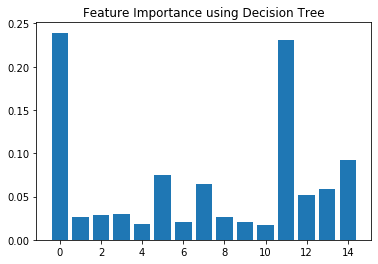

In [231]:
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance using Decision Tree")
plt.

**Conclusions for *Important Features*:**
 
* Most important features for building out model were: 

   **no_rent_change** : 0.2393282
   
   **NoFinesViolation** : 0.231247




    

## Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
regression = LogisticRegression()
regression.fit(X_train, y_train)

LogisticRegression()

Now that our **Model is trained**, we can **test** it on *X_test* and than compare the accuary to y_test 

In [168]:
regression_output = logistic_reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [170]:
print("Accuracy:",metrics.accuracy_score(y_test, regression_output))

Accuracy: 0.8047171780421624
